In [2]:
import numpy as np
import math as m
import os
os.environ["NUMBA_ENABLE_CUDASIM"] = "1"
from numba import jit, njit, vectorize, cuda

## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [2]:
#exercise 1
from numba import vectorize, int64, float32

A = np.array([2,5,10,3,8])

@vectorize(["float32(float32)", "float64(float64)"])
def log(x):
    return m.log(x)

@vectorize(["float32(float32)", "float64(float64)"])
def exp(x):
    return m.e**x

print('log(A) =',log(A))
print('exp(A) =',exp(A))

log(A) = [0.69314718 1.60943791 2.30258509 1.09861229 2.07944154]
exp(A) = [7.38905610e+00 1.48413159e+02 2.20264658e+04 2.00855369e+01
 2.98095799e+03]


## Exercise 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

Text(0.5, 1.0, 'after suppression')

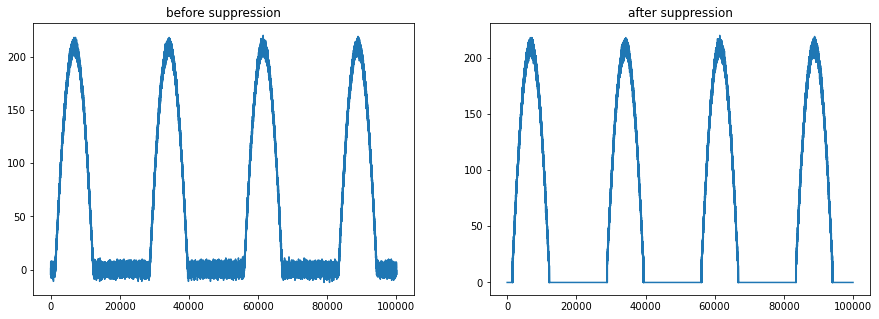

In [32]:
#exercise 3
%matplotlib inline
from matplotlib import pyplot as plt

threshold = 15
n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)

# suppression function
def zero_suppression(values, threshold):
    cond = np.less(np.absolute(values), threshold)
    return np.where(cond, 0, values)

data_suppressed = zero_suppression(data, threshold)

# plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.plot(data) 
ax1.set_title('before suppression')

ax2.plot(zero_suppression(data_suppressed, threshold))
ax2.set_title('after suppression')

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [3]:
#exercise 4
X = np.random.rand(3,3)
Y = np.random.rand(3,3)

def k(x, y, alpha, c):
    return np.tanh(alpha * x.T * y + c)

@cuda.jit
def sigmoid_kernel(X,Y):
    x, y = cuda.grid(2) 
    if (x < X.size and y < Y.size):
        k(X[x],Y[y])
        X[x] += 1 
        Y[y] += 1

#sigmoid_kernel(X,Y)

## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.


In [7]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

# Initialize the data arrays
A = numpy.ones((24,12))  
B = numpy.ones((12,22))  

# Configure the blocks
threadsperblock = threadsperblock = (8, 4) #ThreadsPerBlock must be a divisor of the data dimension 
blockspergrid_x = #int(m.ceil(data.shape[0] / threadsperblock[0]))   
blockspergrid_y = #int(m.ceil(data.shape[1] / threadsperblock[1]))  
blockspergrid = (blockspergrid_x, blockspergrid_y)

#matmul[blockspergrid, threadsperblock](A,B,C)


SyntaxError: invalid syntax (<ipython-input-7-c68a02bfa75d>, line 24)